# Project: Titanic - Machine Learning from Disaster 

## 1. Introduction

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## 2. Loading the Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
train_df = pd.read_csv("C:/Users/Admin/data/train.csv")
test_df = pd.read_csv("C:/Users/Admin/data/test.csv") 

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

###### Note:

* survival: Survival 
* pclass: Ticket class 
* sex: Sex 
* Age: age
* SibSp: # of siblings/ spouses aboard the Titanic 
* parch: # of parents / children aboard the Titanic 
* ticket: Ticket number 
* fare: Passenger fare 
* Cabin: Cabin number 
* Embarked: Port of Embarkation 

In [5]:
# Preview data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### PassengerId 
The first column is the passenger Id. The ID for a passenger is just a number to identify this passenger in this dataset. So this columns is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df set_index method. 

In [6]:
train_df.set_index(train_df["PassengerId"], inplace = True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df = pd.read_csv("C:/Users/Admin/data/train.csv", index_col = "PassengerId")

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
test_df = pd.read_csv("C:/Users/Admin/data/test.csv", index_col = "PassengerId")

In [11]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# 1.Feature Classification: Categorical vs Numerical 
* This helps us select the approriatte plots for visualization 

##### Which features are categorical? 

* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval` 
* To classify the samples into sets of similar examples 

##### Which features are numerical? 

* Numerical feature : `discrete`, `continous`, or `timeseries`
* These value change from sample to sample 

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`. 
* Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
* Numerical: `Age`, `Fare`, (discrete) 
* Mix types of date: `Ticket`, `Cabin` 
* Contain Error/Type : `Name` 
* Blank or NULL : `Cabin` > `Age` > `Embarked` . 
* Various Data Type: String, int , float. 

According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag the person's survivorship. Yet the data type of the column is int64, which a numerical type. We can change that with the following command. 

In [13]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [14]:
train_df["Survived"].dtype 

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [16]:
converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features): 
    for feature in features: 
        df[feature] = df[feature].astype("category")
        
convert_cat(train_df, converted_features)
convert_cat(test_df, converted_features)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


##### Distribution of Numerical feature values across the sameples

In [19]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


##### Distribution of Categorical features 

In [20]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)

### 3.1 EDA for Categorical features

##### Correlating categorical features 

* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`

### Target Variable: `Survived`

In [21]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [22]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### `Sex`

In [23]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [24]:
train_df["Sex"].value_counts(normalize = True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

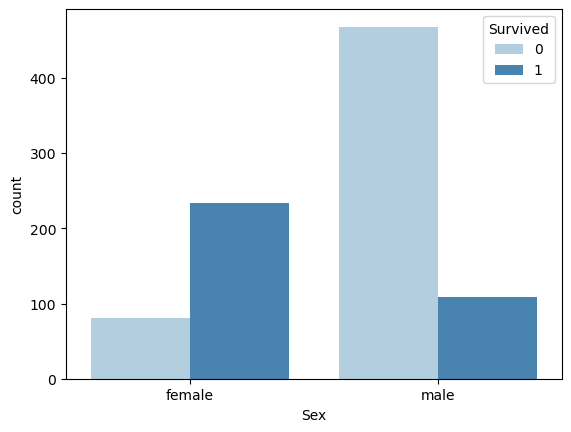

In [25]:
sns.countplot(data = train_df, x = "Sex", hue = 'Survived', palette = "Blues")

- Remaing Categorical Feature Columns 

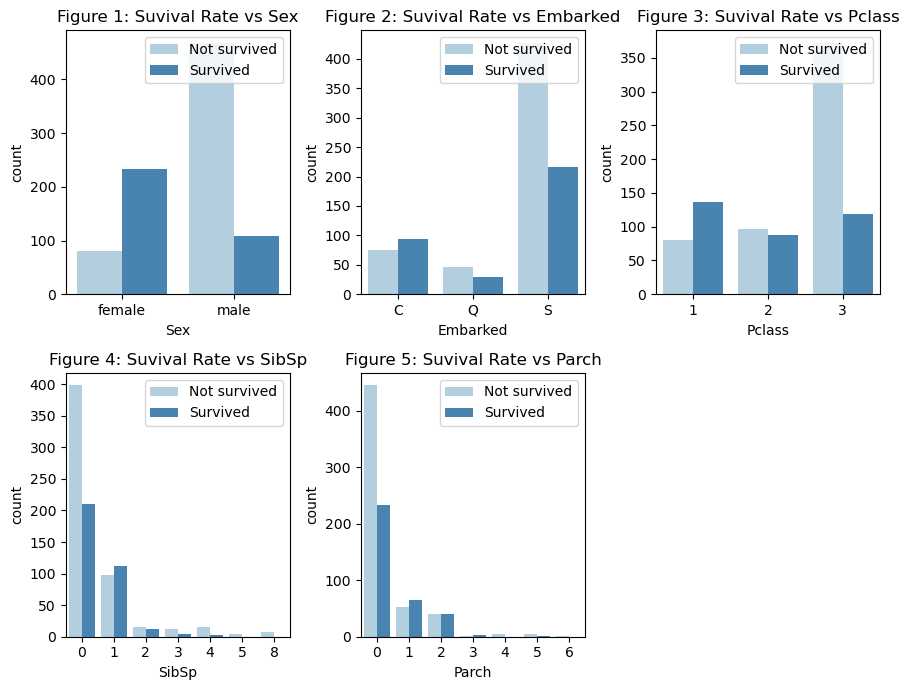

In [26]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2 
n_cols = 3 

fig,ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.0, n_rows*3.5))

for r in range(0, n_rows): 
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = "Survived", palette = "Blues", ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Suvival Rate vs {cols[i]}")
            ax_i.legend(title = '', loc = "upper right", labels = ["Not survived", "Survived"])
            
ax.flat[-1].set_visible(False) # Remove last subplots 
plt.tight_layout()

### Observation: 
- Survival rate: 
    * Fig 1: Femal survival rate > male 
    * Fig 2: Most People embarked on Southampton, an also had the highest people not survived 
    * Fig 3: 1st class higher survived rate 
    * Fig 4: People going with 0 `SibSp` are mostply not survived. the number of passenger with 1-2 family members has a better chance of survival. 
    * Fig 5: People going with a `Parch` are mostly not survived. 

### 3.2 EDA for Numerical Features 
- Numerical Features: (continous) `Age`, `Fare`

### Age 

<Axes: xlabel='Age', ylabel='Count'>

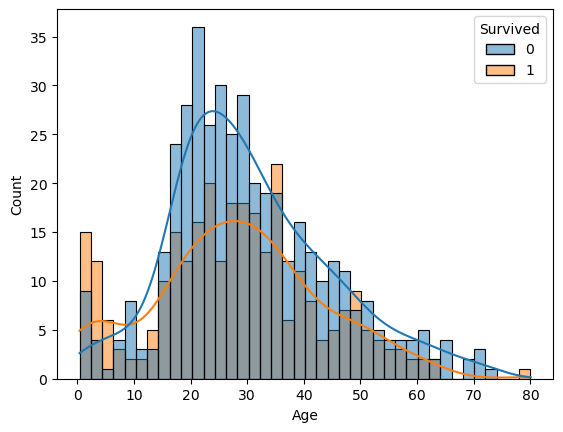

In [27]:
sns.histplot(data = train_df, x = 'Age', hue = "Survived" ,bins = 40, kde = True)

- Majority passengers were from 18 - 40 ages 
- Children had more changes to survive than other ages 

In [28]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

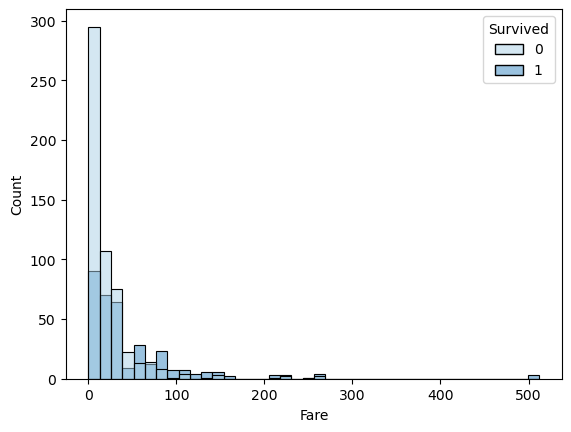

In [29]:
sns.histplot(data = train_df, x = "Fare", hue = "Survived", bins = 40, palette = "Blues")

<Axes: xlabel='Fare', ylabel='count'>

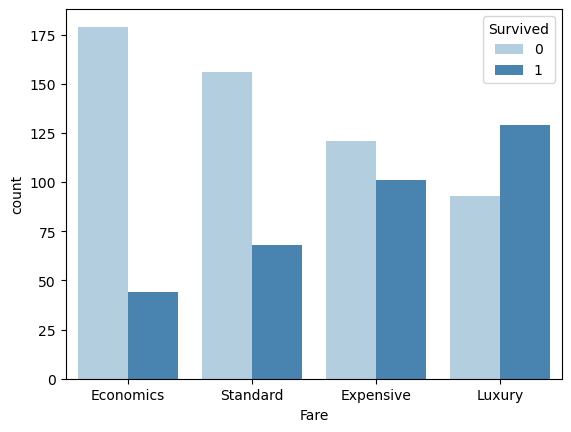

In [30]:
0 - 25 , 25 - 50 , 50 -75, 75 - 100
fare_category = ['Economics', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df["Fare"], 4, labels = fare_category)

sns.countplot(x=quartile_data, hue = train_df["Survived"], palette = "Blues")

In [31]:
train_df["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

 - Distribution of Fare 
     * Fare does not follow a normal distribution and has a huge spice at the price range `[0-100] $`
     * The distribution is skewed to the left with `75$` of the late paid under '$31' and a max paid of `$512`
     
- Quartile plot: 
    * Passenger with Luxury & Expensive Fare will have more chanve to survive 

## 4. Feature Engineering & Data Wrangling 

#### Name

- Regular Expression

In [32]:
train_df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [33]:
import re

def extract_title(name): 
    p = re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip() 

train_df["Title"] = train_df["Name"].apply(lambda name: extract_title(name))

In [34]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [35]:
test_df["Title"] = test_df["Name"].apply(lambda name : extract_title(name))

In [36]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

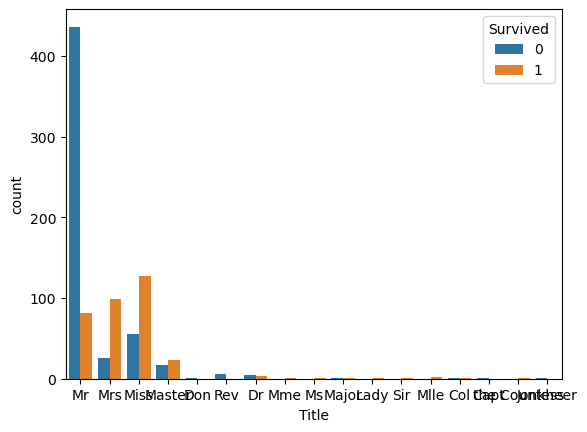

In [37]:
sns.countplot(data=train_df, x = "Title", hue = "Survived")

In [38]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']: 
        return title 
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'

train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

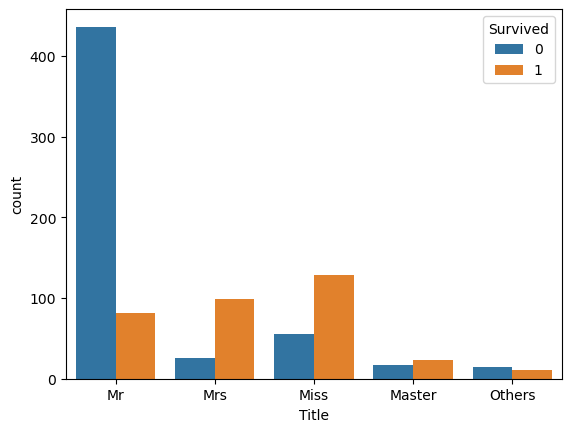

In [39]:
sns.countplot(data=train_df, x = "Title", hue = "Survived")

# Family 
- `SibSp`, `Farch`

In [40]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [41]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [42]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large'])

In [43]:
train_df['Family_Cat']

PassengerId
1      Small
2      Small
3       Solo
4      Small
5       Solo
       ...  
887     Solo
888     Solo
889    Small
890     Solo
891     Solo
Name: Family_Cat, Length: 891, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

<Axes: xlabel='Family_Cat', ylabel='count'>

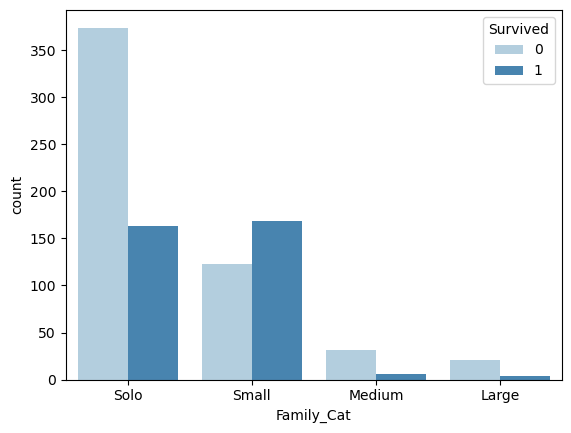

In [44]:
sns.countplot(data=train_df, x = "Family_Cat", hue = "Survived",palette = "Blues")

In [45]:
test_df["Family_Cat"] = pd.cut(test_df["Family_Size"], bins = [0,1,4,6,20], labels = ["Solo", "Small", "Medium", "Large"])

In [46]:
test_df["Family_Cat"]

PassengerId
892      Solo
893     Small
894      Solo
895      Solo
896     Small
        ...  
1305     Solo
1306     Solo
1307     Solo
1308     Solo
1309    Small
Name: Family_Cat, Length: 418, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

### Data Wrangling

In [47]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features 
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [48]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols: 
        missing_count = df[col].isnull().sum() 
        if missing_count > 0: 
            print(f"Percent {col} has {missing_count*100/n_rows : .2f}% missing values")
            
display_missing(train_df, feature_cols)

Percent Age has  19.87% missing values
Percent Embarked has  0.22% missing values


In [49]:
display_missing(test_df, feature_cols)

Percent Age has  20.57% missing values
Percent Fare has  0.24% missing values


### Filling missing values 
##### Age 
- Fill missing values with median of whole dataset 


In [50]:
average_age_train = int(train_df['Age'].mean())

train_df['Age'] = train_df['Age'].fillna(average_age_train)

average_age_test = int(test_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(average_age_test)

In [51]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Percent Embarked has  0.22% missing values
Percent Fare has  0.24% missing values


In [52]:
x = train_df[feature_cols]
y = train_df["Survived"]

In [53]:
x_test = test_df[feature_cols]

In [54]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [55]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [56]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [57]:
x = preprocessor.transform(x) 

In [58]:
x_test = preprocessor.transform(x_test)

# 5. Model Training

In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2) ## 20% 

In [61]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [62]:
x_test.shape

(418, 19)

In [63]:
# binary classification 

# Logistic regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [64]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000) 
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [65]:
log_reg.score(x_val, y_val)

0.8491620111731844

In [66]:
y_pred = log_reg.predict(x_val)

In [67]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8305084745762712, 0.7424242424242424)

In [68]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       113
           1       0.83      0.74      0.78        66

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



 - y = a*x + b*x2 + bias -> y = a*x1^2 + b*x^2 + c*x1*x2 + bias 

In [69]:
poly = PolynomialFeatures(degree = 5)
poly_features_x_train = poly.fit_transform(x_train) 
poly_features_x_val = poly.transform(x_val)

In [70]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)

poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [71]:
poly_log_reg.score(poly_features_x_val, y_val)

0.8435754189944135

In [72]:
# Decision Tree 

decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [73]:
decision_tree.score(x_val, y_val)

0.7988826815642458

### 5.1 Cross-validation 

In [74]:
from sklearn.model_selection import cross_val_score 

In [75]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2022)

In [76]:
lr_scores = cross_val_score(log_reg_cv, x, y, scoring = 'accuracy', cv = 5)

In [79]:
lr_scores.mean(), lr_scores.std()

(0.8237838177138912, 0.020974212551877137)

In [80]:
dt_scores = cross_val_score(dt_cv, x,y,scoring = 'accuracy', cv = 5)

In [81]:
dt_scores.mean(), dt_scores.std()

(0.8002510827945516, 0.019343059415097626)

###  5.2 Baseline Model Comparison 

In [86]:
from sklearn.svm import LinearSVC, SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

seed = 2023

models = [
    LinearSVC(random_state = seed), 
    SVC(random_state = seed), 
    KNeighborsClassifier(metric = 'minkowaki', p=2),
    LogisticRegression(solver = 'liblinear', max_iter = 1000), 
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed), 
    ExtraTreeClassifier(), 
    AdaBoostClassifier(), 
    XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = seed)
]

ModuleNotFoundError: No module named 'xgboost'